# Visualization
-----
## Matplot 고급 시각화 기법
### 이미지 그리기
#### 이미지 데이터를 활용한 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 이미지 데이터 (3x3 크기의 흑백 이미지)
image_data = np.array([[0.1, 0.4, 0.7],
                       [0.3, 0.6, 0.9],
                       [0.2, 0.5, 0.8]])

plt.imshow(image_data, cmap='gray')  # 흑백 이미지를 회색조로 표시
plt.colorbar()  # 컬러바 추가
plt.title('Image Plot')
plt.show()

##### 컬러맵 설정
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 이미지 데이터 (3x3 크기의 흑백 이미지)
image_data = np.array([[0.1, 0.4, 0.7],
                       [0.3, 0.6, 0.9],
                       [0.2, 0.5, 0.8]])

plt.imshow(image_data, cmap='jet')  # 'jet' 컬러맵 사용
plt.colorbar()  # 컬러바 추가
plt.title('Image Plot with Jet Colormap')
plt.show()

### 이미지 처리
#### 이미지 처리 라이브러리
- Pillow
- OpenCV
- scikit-image
- imageio
- numpy와 matplotlib (*)

In [ ]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
# 이미지 읽어오기
image = img.imread('../data/white-horse.jpg')
type(image) 
print(image.shape)  # 895x1280 3채널

In [ ]:
image

In [ ]:
np.min(image), np.max(image)

In [ ]:
# 이미지 출력 (imshow)
plt.imshow(image)

In [ ]:
# 이미지 상하 반전
plt.imshow(image[::-1])

In [ ]:
# 이미지 좌우 반전
plt.imshow(image[:, ::-1])

In [ ]:
# Cropping
plt.imshow(image[100:800, 400:1000])
plt.savefig('../generated/white-horse-cropped.png')

### 고급 그래프
#### 상자 그림 (Box Plot)
- 박스 플롯의 특징
    - 중앙값, 1사분위수, 3사분위수 등의 통계적 요약 정보를 그래픽으로 표현
    - 데이터의 분포, 중심 경향, 이상치 등을 한 눈에 파악
    - IQR(Interquartile Range, 사분범위)를 이용하여데이터의 변동성과 이상치를 시각적으로 표현
- 장점
    - 데이터의 전반적인 분포와 중앙값, 이상치 등을 쉽게 파악 가능
    - 여러 그룹의 데이터 분포를 한번에 비교하기 좋음
    - 데이터의 대략적인 대칭성, 편향도 등을 확인할 수 있음
    - 이상치의 존재를 명확히 확인 가능
- 단점
    - 데이터의 실제 값을 정확히 나타내지 않음
    - 데이터의 분포 모양(예: 다봉분포)을 구체적으로 파악하기 어려움
    - 큰 데이터셋에서의 미세한 차이를 구분하기 어려울 수 있음
    - 모든 유형의 데이터셋에 적합하지 않을 수 있음 (예: 데이터 포인트가 너무 적은 경우)
#### 상자 그림의 주요 구성 요소
- 상자
    - 상자의 아래쪽과 위쪽은 1사분위수(Q1)와 3사분위수(Q3)를 나타냄
    - 상자의 길이는 IQR(Interquartile Range, 사분범위)라고 하며 데이터의 중간 50%를 나타냄
- 중앙선
    - 상자 내부의 선은 중앙값(median 또는 2사분위수)을 나타냄
- 수염(Whiskers)
    - 데이터의 분포 범위를 나타내는 선
    - 아래 수염: Q1 - 1.5 * IQR
    - 위 수염: Q3 + 1.5 * IQR
- 이상치(Outlier)
    - 수염 밖의 점으로 일반적인 분포 범위에서 크게 벗어난 값

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 데이터 예시
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 30])

# 박스플롯 생성
plt.boxplot(data)
plt.title('Box Plot')
plt.show()

In [ ]:
# 사분위수 계산
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)

print("1사분위수: ", q1)
print("2사분위수: ", q2)    # 2사분위수 == 중앙값
print("3사분위수: ", q3)
print("중앙값: ", np.median(data)) 

iqr = q3 - q1
print("IQR: ", iqr)

# 아랫수염
lower = q1 - 1.5 * iqr
# 윗수염
upper = q3 + 1.5 * iqr
print("아랫수염: ", lower)
print("윗수염: ", upper)

# 이상치
outlier = data[(data < lower) | (data > upper)]
print("이상치: ", outlier)

#### 바이올린 그래프 (Violin Plot)
- 특징
    - KDE(Kernel Density Estimation)의 원리를 기반으로 데이터의 밀도를 시각화
    - 박스 플롯과 유사한 정보를 포함하지만, 데이터의 분포 밀도를 좀 더 상세히 표현
    - 데이터의 분포가 대칭이 아닐 때에도 그 분포의 형태를 잘 보여줌
- 장점
    - 데이터의 분포와 밀도를 한 눈에 파악할 수 있음
    - 여러 그룹 간의 데이터 분포 비교에 유용
    - 박스 플롯보다 데이터의 분포 형태에 대한 정보를 더 자세히 제공
- 단점
    - 처음 보는 사람들에게는 해석이 복잡하거나 이해하기 어려울 수 있음
    - 데이터의 실제 수치를 정확하게 나타내지 않음
    - 너무 많은 카테고리나 그룹이 있을 경우 시각적으로 복잡하게 보일 수 있음

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

tips.shape  # 244 x 7
tips.info()

In [ ]:
# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("Total Bill by Day")
plt.show()

In [ ]:
# 성별 및 흡연 여부에 따른 전체 계산 금액의 분포
plt.figure(figsize=(12, 6))

sns.violinplot(x="sex", y="total_bill", 
               hue="smoker", 
               data=tips, 
               split=True, 
               inner="quart", 
               palette="muted")
# sns.violinplot(x="smoker", y="total_bill", 
#                hue="sex", 
#                data=tips, 
#                split=True, 
#                inner="quart", 
#                palette="muted")
plt.title("Total Bill by Gender and Smoking Status")
plt.show()

#### 히트맵 (Heatmap)
- 히트맵의 특징
    - 데이터의 값을 색상으로 나타내는 시각화 방법
    - 행과 열로 구성된 2차원 테이블 형태의 데이터에 주로 사용
    - 값의 상대적인 크기를 비교하거나 패턴을 파악하는 데 사용
- 장점
    - 데이터의 분포와 상관관계를 시각적으로 파악하기 용이
    - 복잡한 데이터 구조에서 패턴이나 군집을 쉽게 식별할 수 있음
    - 여러 변수 간의 관계를 동시에 분석할 수 있는 다중 변수 시각화에 적합
- 단점
    - 색상 선택이 중요하며, 부적절한 색상 사용은 오해를 초래할 수 있음
    - 데이터 값의 정확한 수치를 파악하기 어려울 수 있음
    - 고밀도 데이터의 경우 작은 셀 내의 정보 표현이 어려울 수 있음
    - 너무 많은 변수를 함께 표현할 경우 가독성이 저하될 수 있음

In [2]:
#
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
# Seaborn의 샘플 데이터셋 불러오기
flights_data = sns.load_dataset("flights")
flights_data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [4]:
# 피벗 테이블 생성
flights_pivot = flights_data.pivot_table(index="month", columns="year", values="passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


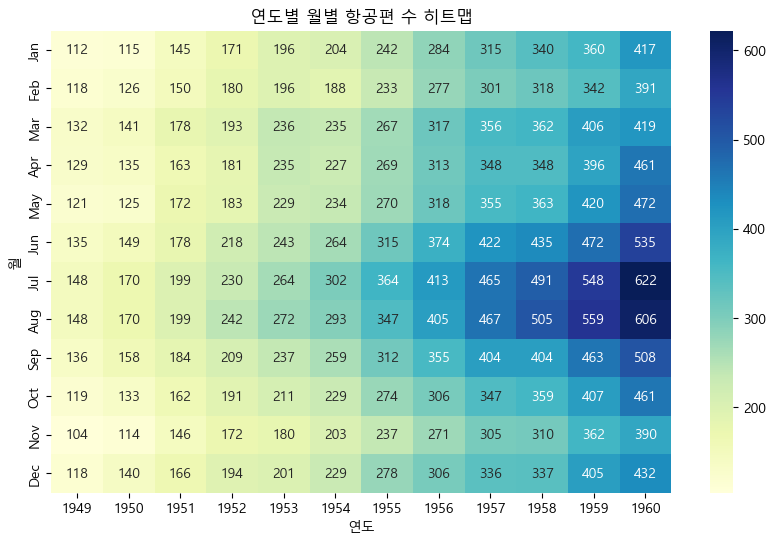

In [3]:
# Seaborn을 사용하여 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(flights_pivot, # 히트맵에 사용할 데이터
            cmap="YlGnBu", # 색상 맵 지정
            annot=True, # 각 셀에 숫자 표시 여부
            fmt="d")    # 포맷 지정, d: 정수형
plt.title("연도별 월별 항공편 수 히트맵")
plt.xlabel("연도")
plt.ylabel("월")
plt.show()